Following: https://github.com/AIBiology/Jupyter_Content/blob/main/ZZ_older_notebooks/Decision_Trees.ipynb by Matt Gitzendanner

Using Tensorflow-2.4.1 on HiPerGator

In [1]:
##import all packages
%matplotlib inline
import numpy as np
import pandas as pd
import plotnine as pn
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import accuracy_score,confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.tree import plot_tree
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_digits
from sklearn import metrics


In [2]:
# Load the leaf data
df= pd.read_csv('01-leaf_traditional_descriptors.csv')
df

,img,id,rep,leafNum,morphotype,morphotpe_Num,pheno,area,circularity,convexity,solidity,width,length,aspect_ratio
0,B_oleracea129_A_0_p0_mask,129,A,2,alboglabra,1,leafy,279446.0,48.925596,0.743907,0.735855,462.168810,1284.963834,0.359675
1,B_oleracea129_A_1_p1_mask,129,A,3,alboglabra,1,leafy,337145.5,41.938678,0.784499,0.770115,503.065127,1367.548415,0.367859
2,B_oleracea129_A_2_p2_mask,129,A,4,alboglabra,1,leafy,242170.5,38.802509,0.784663,0.778726,432.822275,1117.606781,0.387276
3,B_oleracea129_B_0_p0_mask,129,B,2,alboglabra,1,leafy,195548.5,46.409848,0.799352,0.716393,401.195141,1110.188851,0.361376
4,B_oleracea129_B_1_p1_mask,129,B,3,alboglabra,1,leafy,271529.5,47.963858,0.749349,0.754199,452.888092,1250.563292,0.362147
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2497,B_oleracea194_C_1_p1_mask,194,C,3,viridis,22,leafy,1164087.5,30.312443,0.774609,0.816740,1183.139673,1885.871846,0.627370
2498,B_oleracea194_C_2_p2_mask,194,C,4,viridis,22,leafy,979769.0,32.210772,0.787263,0.806401,1042.935460,1806.928829,0.577187
2499,B_oleracea194_D_0_p0_mask,194,D,2,viridis,22,leafy,961482.5,28.263872,0.759816,0.856197,1023.086166,1661.395621,0.615799
2500,B_oleracea194_D_1_p1_mask,194,D,3,viridis,22,leafy,1529759.5,30.854931,0.749902,0.830479,1329.148207,2122.032277,0.626356


In [3]:
df['morphotype'].value_counts()

alboglabra    240
italica       230
botrytis      199
viridis       191
gemmifera     188
gongylodes    172
capitata      170
ramosa        157
medullosa     146
sabellica     138
palmifolia    124
costata       115
rupestris      75
villosa        58
insularis      56
incana         53
cretica        43
sabauda        42
macrocarpa     39
oleracea       35
montana        19
hilarionis     12
Name: morphotype, dtype: int64

In [4]:
## set up variables for decision tree
X = df.drop(columns=['img', 'id', 'rep', 'leafNum', 'morphotype', 'morphotpe_Num', 'pheno'])
y = df['morphotpe_Num']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

model = Pipeline([ 
    ('scaler', StandardScaler()),
    ('tree', DecisionTreeClassifier())
])

model.fit(X_train, y_train)


(1751, 7) (751, 7) (1751,) (751,)


Pipeline(steps=[('scaler', StandardScaler()),
                ('tree', DecisionTreeClassifier())])

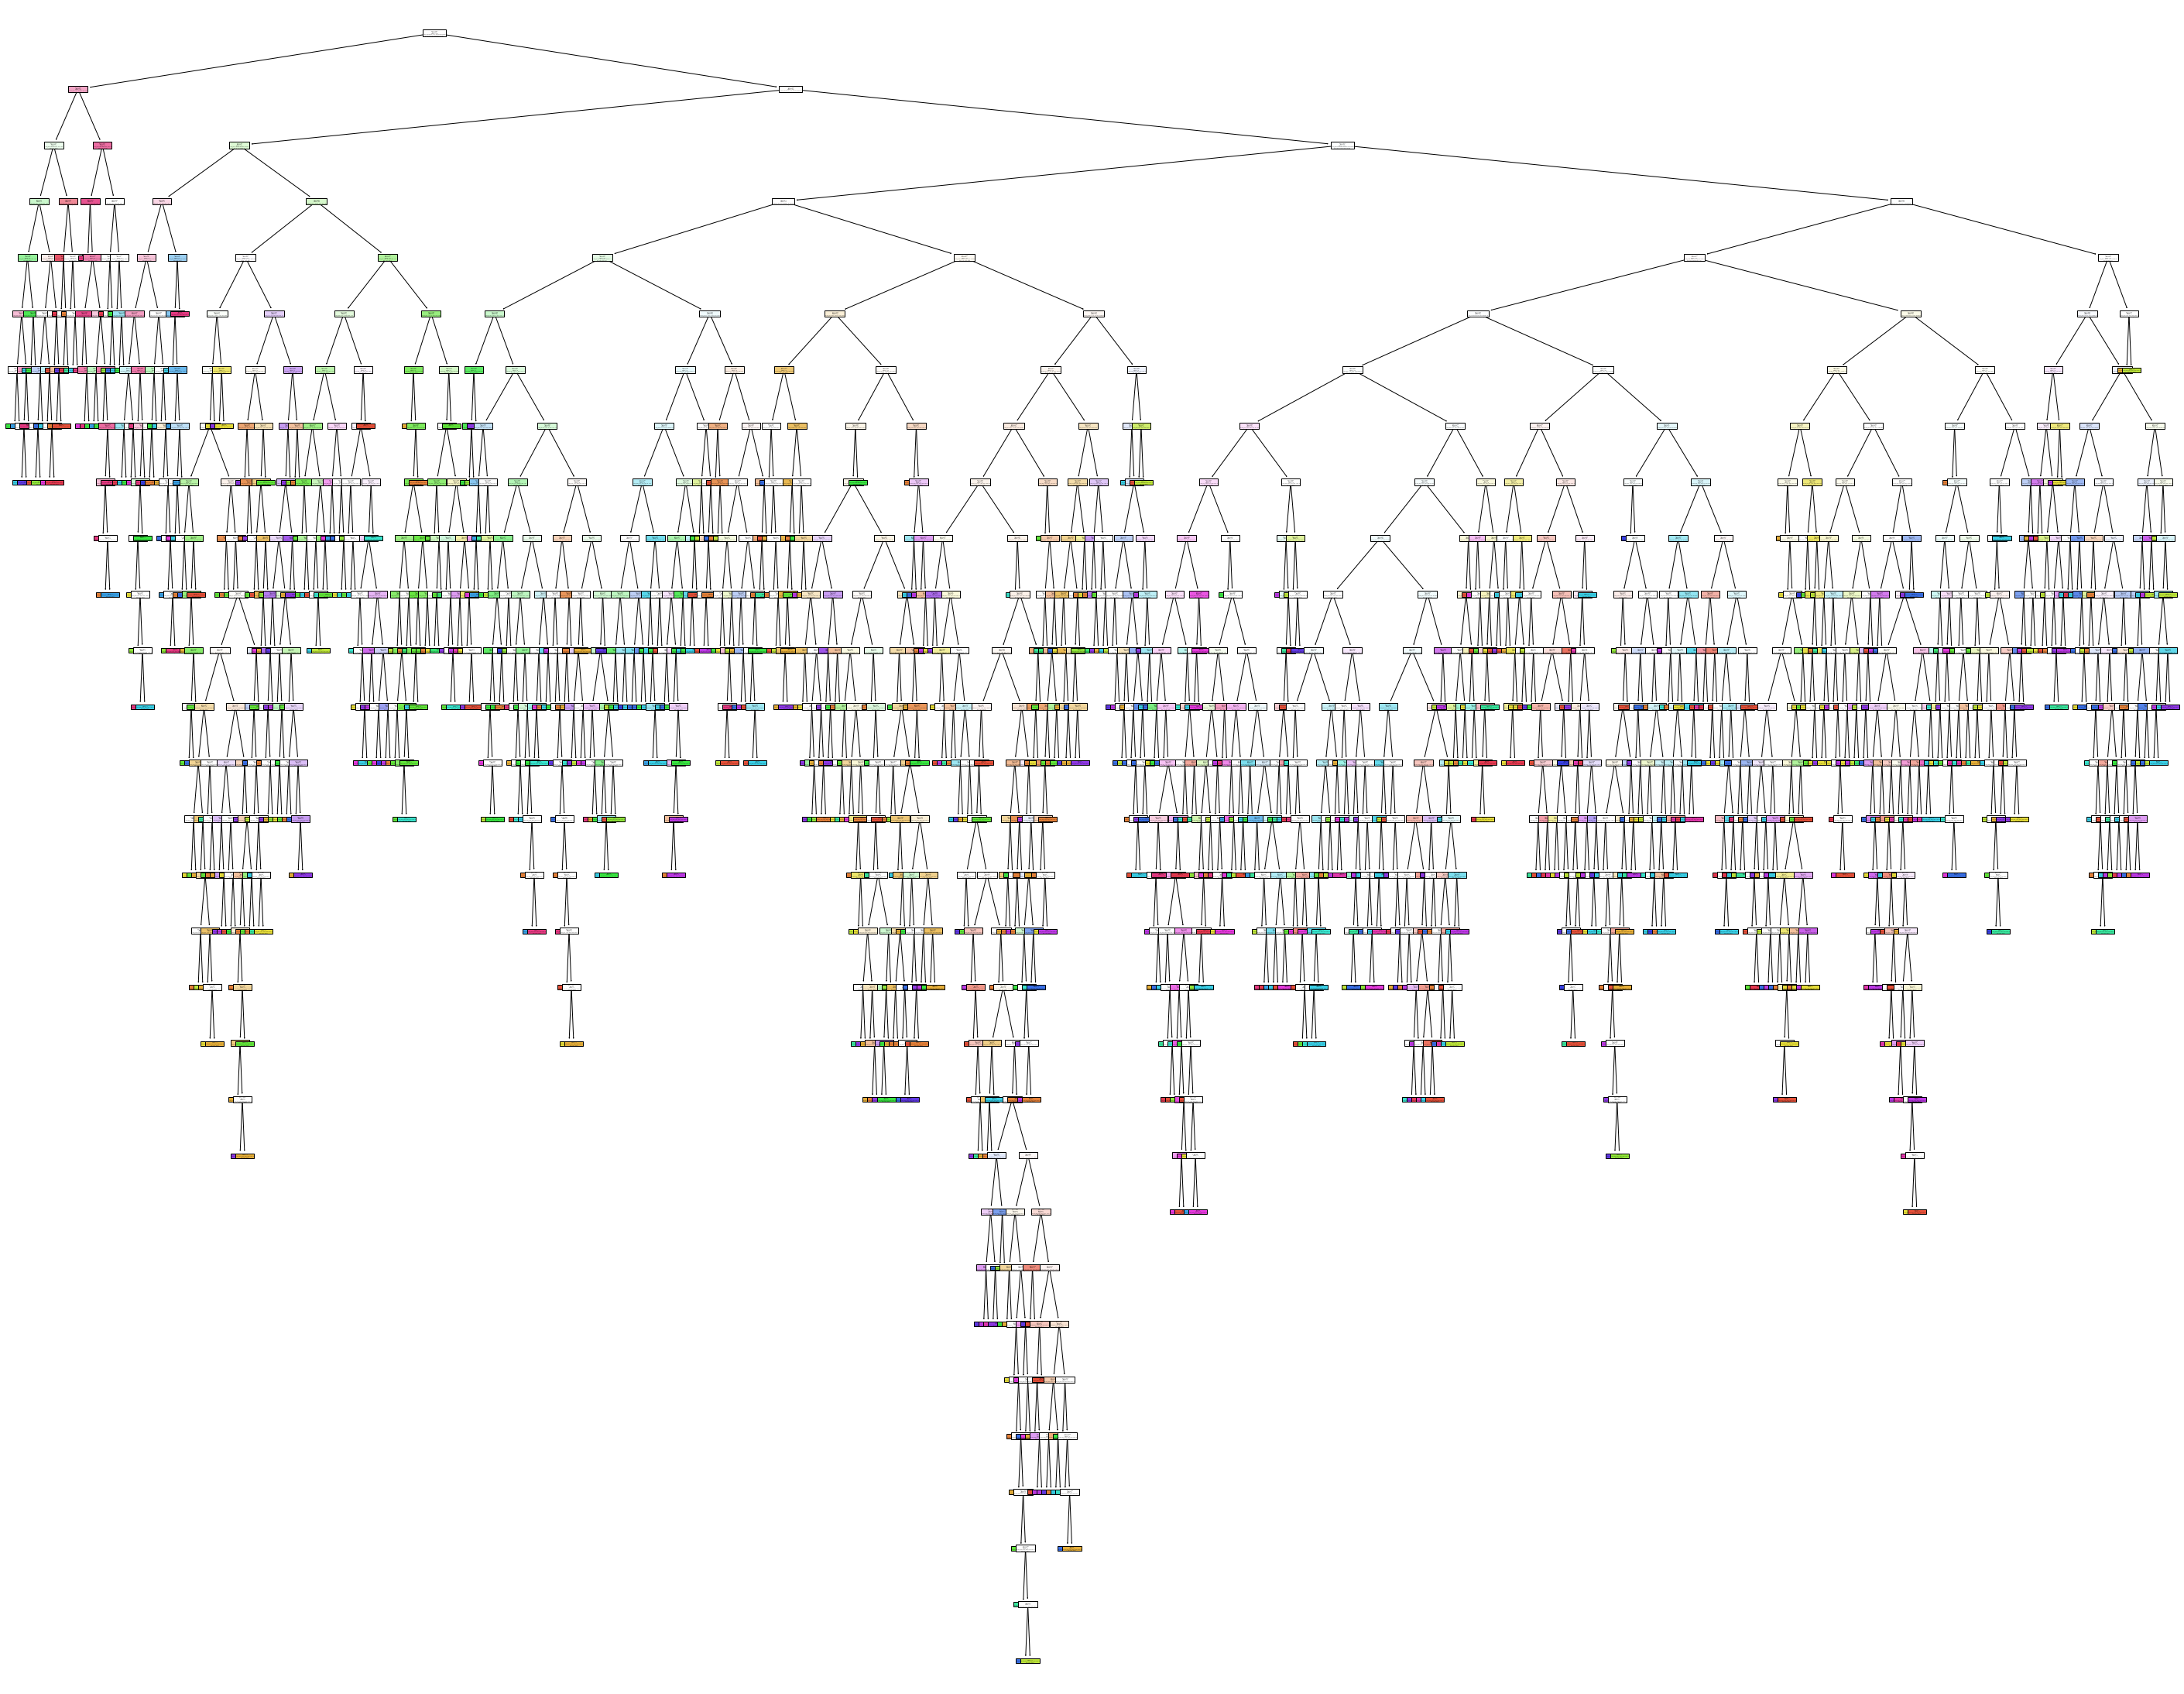

In [5]:
# Visualize the tree using plot_tree
fig = plt.figure(figsize=(50,40))
annotations = plot_tree(model['tree'], filled=True) # Assign text annotations to variable to not print

In [6]:
# helper function to plot confusion matrices from https://www.kaggle.com/arunmohan003/pruning-decision-trees-tutorial?scriptVersionId=66335932
classes = ['alboglabra', 'botrytis', 'capitata', 'costata', 'cretica',
       'gemmifera', 'gongylodes', 'hilarionis', 'incana', 'insularis',
       'italica', 'macrocarpa', 'medullosa', 'montana', 'oleracea',
       'palmifolia', 'ramosa', 'rupestris', 'sabauda', 'sabellica',
       'villosa', 'viridis']

def plot_confusionmatrix(y_train,y_train_pred,dom):
    print(f'{dom} Confusion matrix')
    cf = confusion_matrix(y_train,y_train_pred)
    
    df_confusion = pd.DataFrame(cf, index = classes, columns=classes)
    df_confusion['TOTAL'] = df_confusion.sum(axis=1)

    # get percentages
    df_percentages = df_confusion.div(df_confusion.TOTAL, axis=0)
    df_percentages = df_percentages.drop('TOTAL', axis=1)    
    
    #cmap = sns.color_palette("mako_r", as_cmap=True)
    cmap = sns.light_palette("#1b9e77", as_cmap=True)
    #sns.heatmap(cf,annot=True,yticklabels=classes, 
    #            xticklabels=classes, cmap=cmap, fmt = '.1%')
    sns.heatmap(df_percentages,annot=True,yticklabels=classes, 
                xticklabels=classes, cmap=cmap, fmt='0.1%')
    plt.tight_layout()
    plt.rcParams["figure.figsize"] = (10,10)
    plt.xlabel("predicted")
    plt.ylabel("actual")
    plt.show()

Train score 1.0
Test score 0.21171770972037285
Train Confusion matrix


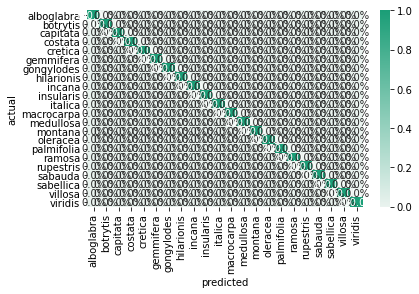

Test Confusion matrix


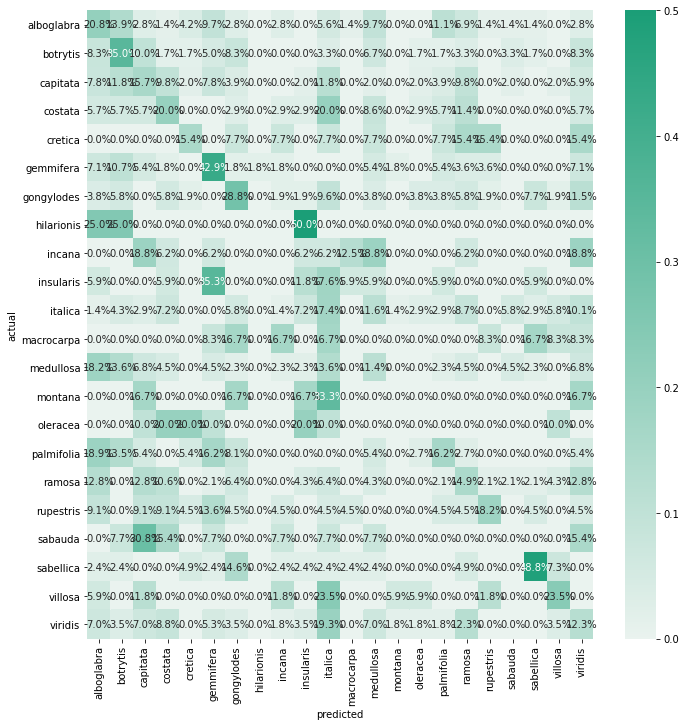

In [7]:
##accuracy for trainning and testing
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print(f'Train score {accuracy_score(y_train_pred,y_train)}')
print(f'Test score {accuracy_score(y_test_pred,y_test)}')

plot_confusionmatrix(y_train,y_train_pred,dom='Train')
plot_confusionmatrix(y_test,y_test_pred,dom='Test')

In [8]:
##model above is overfit, therefore we use purning to prevent this
##finding best alpha (the learning rate)
path = model['tree'].cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
print(ccp_alphas)

[0.         0.00038073 0.00042833 0.00045688 0.00047592 0.00047592
 0.00047592 0.00047592 0.00048952 0.00048952 0.00049971 0.00049971
 0.00049971 0.00049971 0.00049971 0.00049971 0.00050765 0.00050765
 0.00050765 0.00051918 0.00051918 0.00052717 0.00052717 0.00053031
 0.00053303 0.00054514 0.00054627 0.0005711  0.0005711  0.0005711
 0.0005711  0.0005711  0.0005711  0.0005711  0.0005711  0.0005711
 0.0005711  0.0005711  0.0005711  0.0005711  0.0005711  0.0005711
 0.0005711  0.0005711  0.0005711  0.0005711  0.0005711  0.0005711
 0.0005711  0.0005711  0.0005711  0.0005711  0.0005711  0.0005711
 0.0005711  0.0005711  0.0005711  0.0005711  0.0005711  0.0005711
 0.0005711  0.0005711  0.0005711  0.0005711  0.0005711  0.0005711
 0.0005711  0.0005711  0.0005711  0.0005711  0.0005711  0.0005711
 0.0005711  0.0005711  0.0005711  0.0005711  0.0005711  0.0005711
 0.0005711  0.0005711  0.0005711  0.0005711  0.0005711  0.0005711
 0.0005711  0.0005711  0.0005711  0.0005711  0.0005711  0.0005711
 0.000

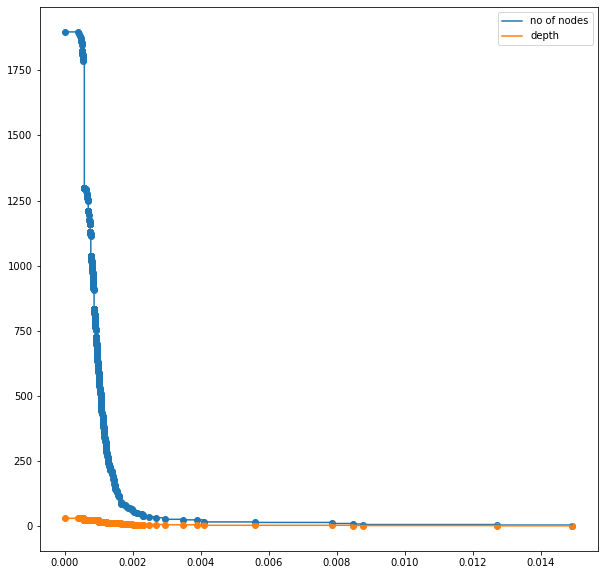

In [9]:
# For each alpha we will append our model to a list and plot it against depth of tree
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
    
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]
node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
plt.scatter(ccp_alphas,node_counts)
plt.scatter(ccp_alphas,depth)
plt.plot(ccp_alphas,node_counts,label='no of nodes',drawstyle="steps-post")
plt.plot(ccp_alphas,depth,label='depth',drawstyle="steps-post")
plt.legend()
plt.show()

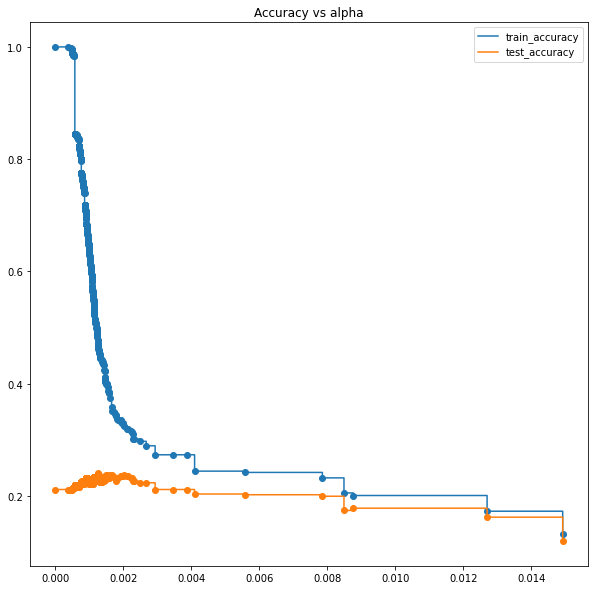

Best accuracy of 0.24101198402130491 obtained at alpha 0.001244744076847536


In [10]:
## check out accuracy vs alpha to find best alpha
train_acc = []
test_acc = []
best_acc=0
best_alpha=0
for c in clfs:
    y_train_pred = c.predict(X_train)
    y_test_pred = c.predict(X_test)
    train_acc.append(accuracy_score(y_train_pred,y_train))
    test_acc.append(accuracy_score(y_test_pred,y_test))
    if accuracy_score(y_test_pred,y_test) > best_acc:
        best_acc=accuracy_score(y_test_pred,y_test)
        best_alpha=c.ccp_alpha

plt.scatter(ccp_alphas,train_acc)
plt.scatter(ccp_alphas,test_acc)
plt.plot(ccp_alphas,train_acc,label='train_accuracy',drawstyle="steps-post")
plt.plot(ccp_alphas,test_acc,label='test_accuracy',drawstyle="steps-post")
plt.legend()
plt.title('Accuracy vs alpha')
plt.show()
print(f'Best accuracy of {best_acc} obtained at alpha {best_alpha}')

Train score 0.4774414620217019
Test score 0.23834886817576564
Train Confusion matrix


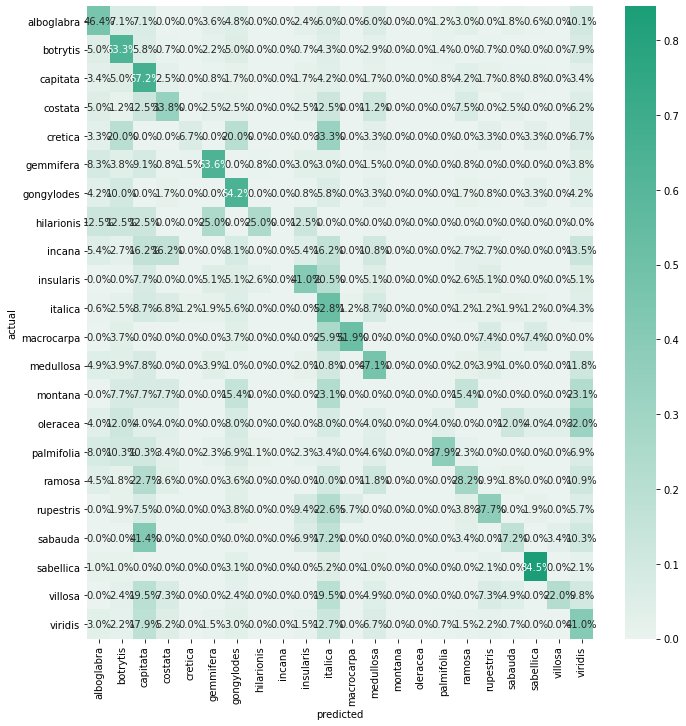

Test Confusion matrix


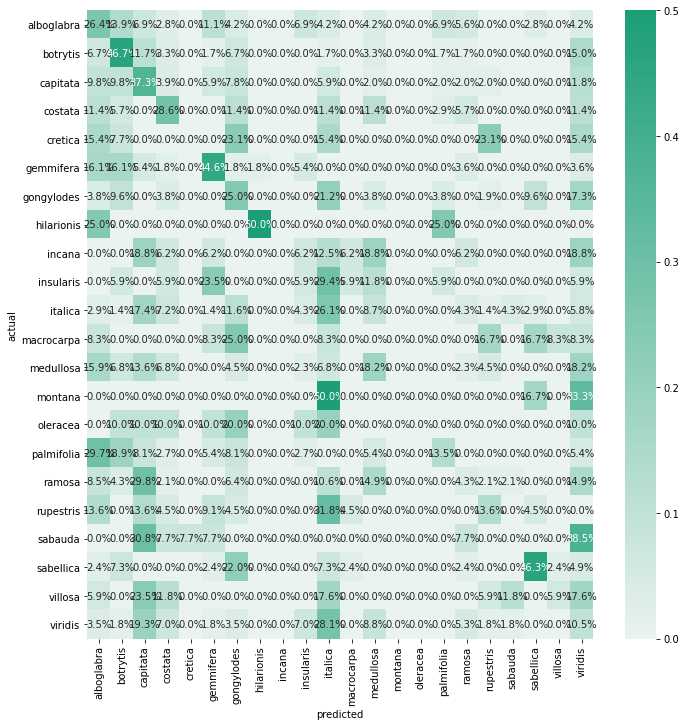

In [11]:
## run decision tree with new paramters
model = Pipeline([ 
    ('scaler', StandardScaler()),
    ('tree', DecisionTreeClassifier(ccp_alpha=0.001244744076847536))
])
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print(f'Train score {accuracy_score(y_train_pred,y_train)}')
print(f'Test score {accuracy_score(y_test_pred,y_test)}')

plot_confusionmatrix(y_train,y_train_pred,dom='Train')
plot_confusionmatrix(y_test,y_test_pred,dom='Test')

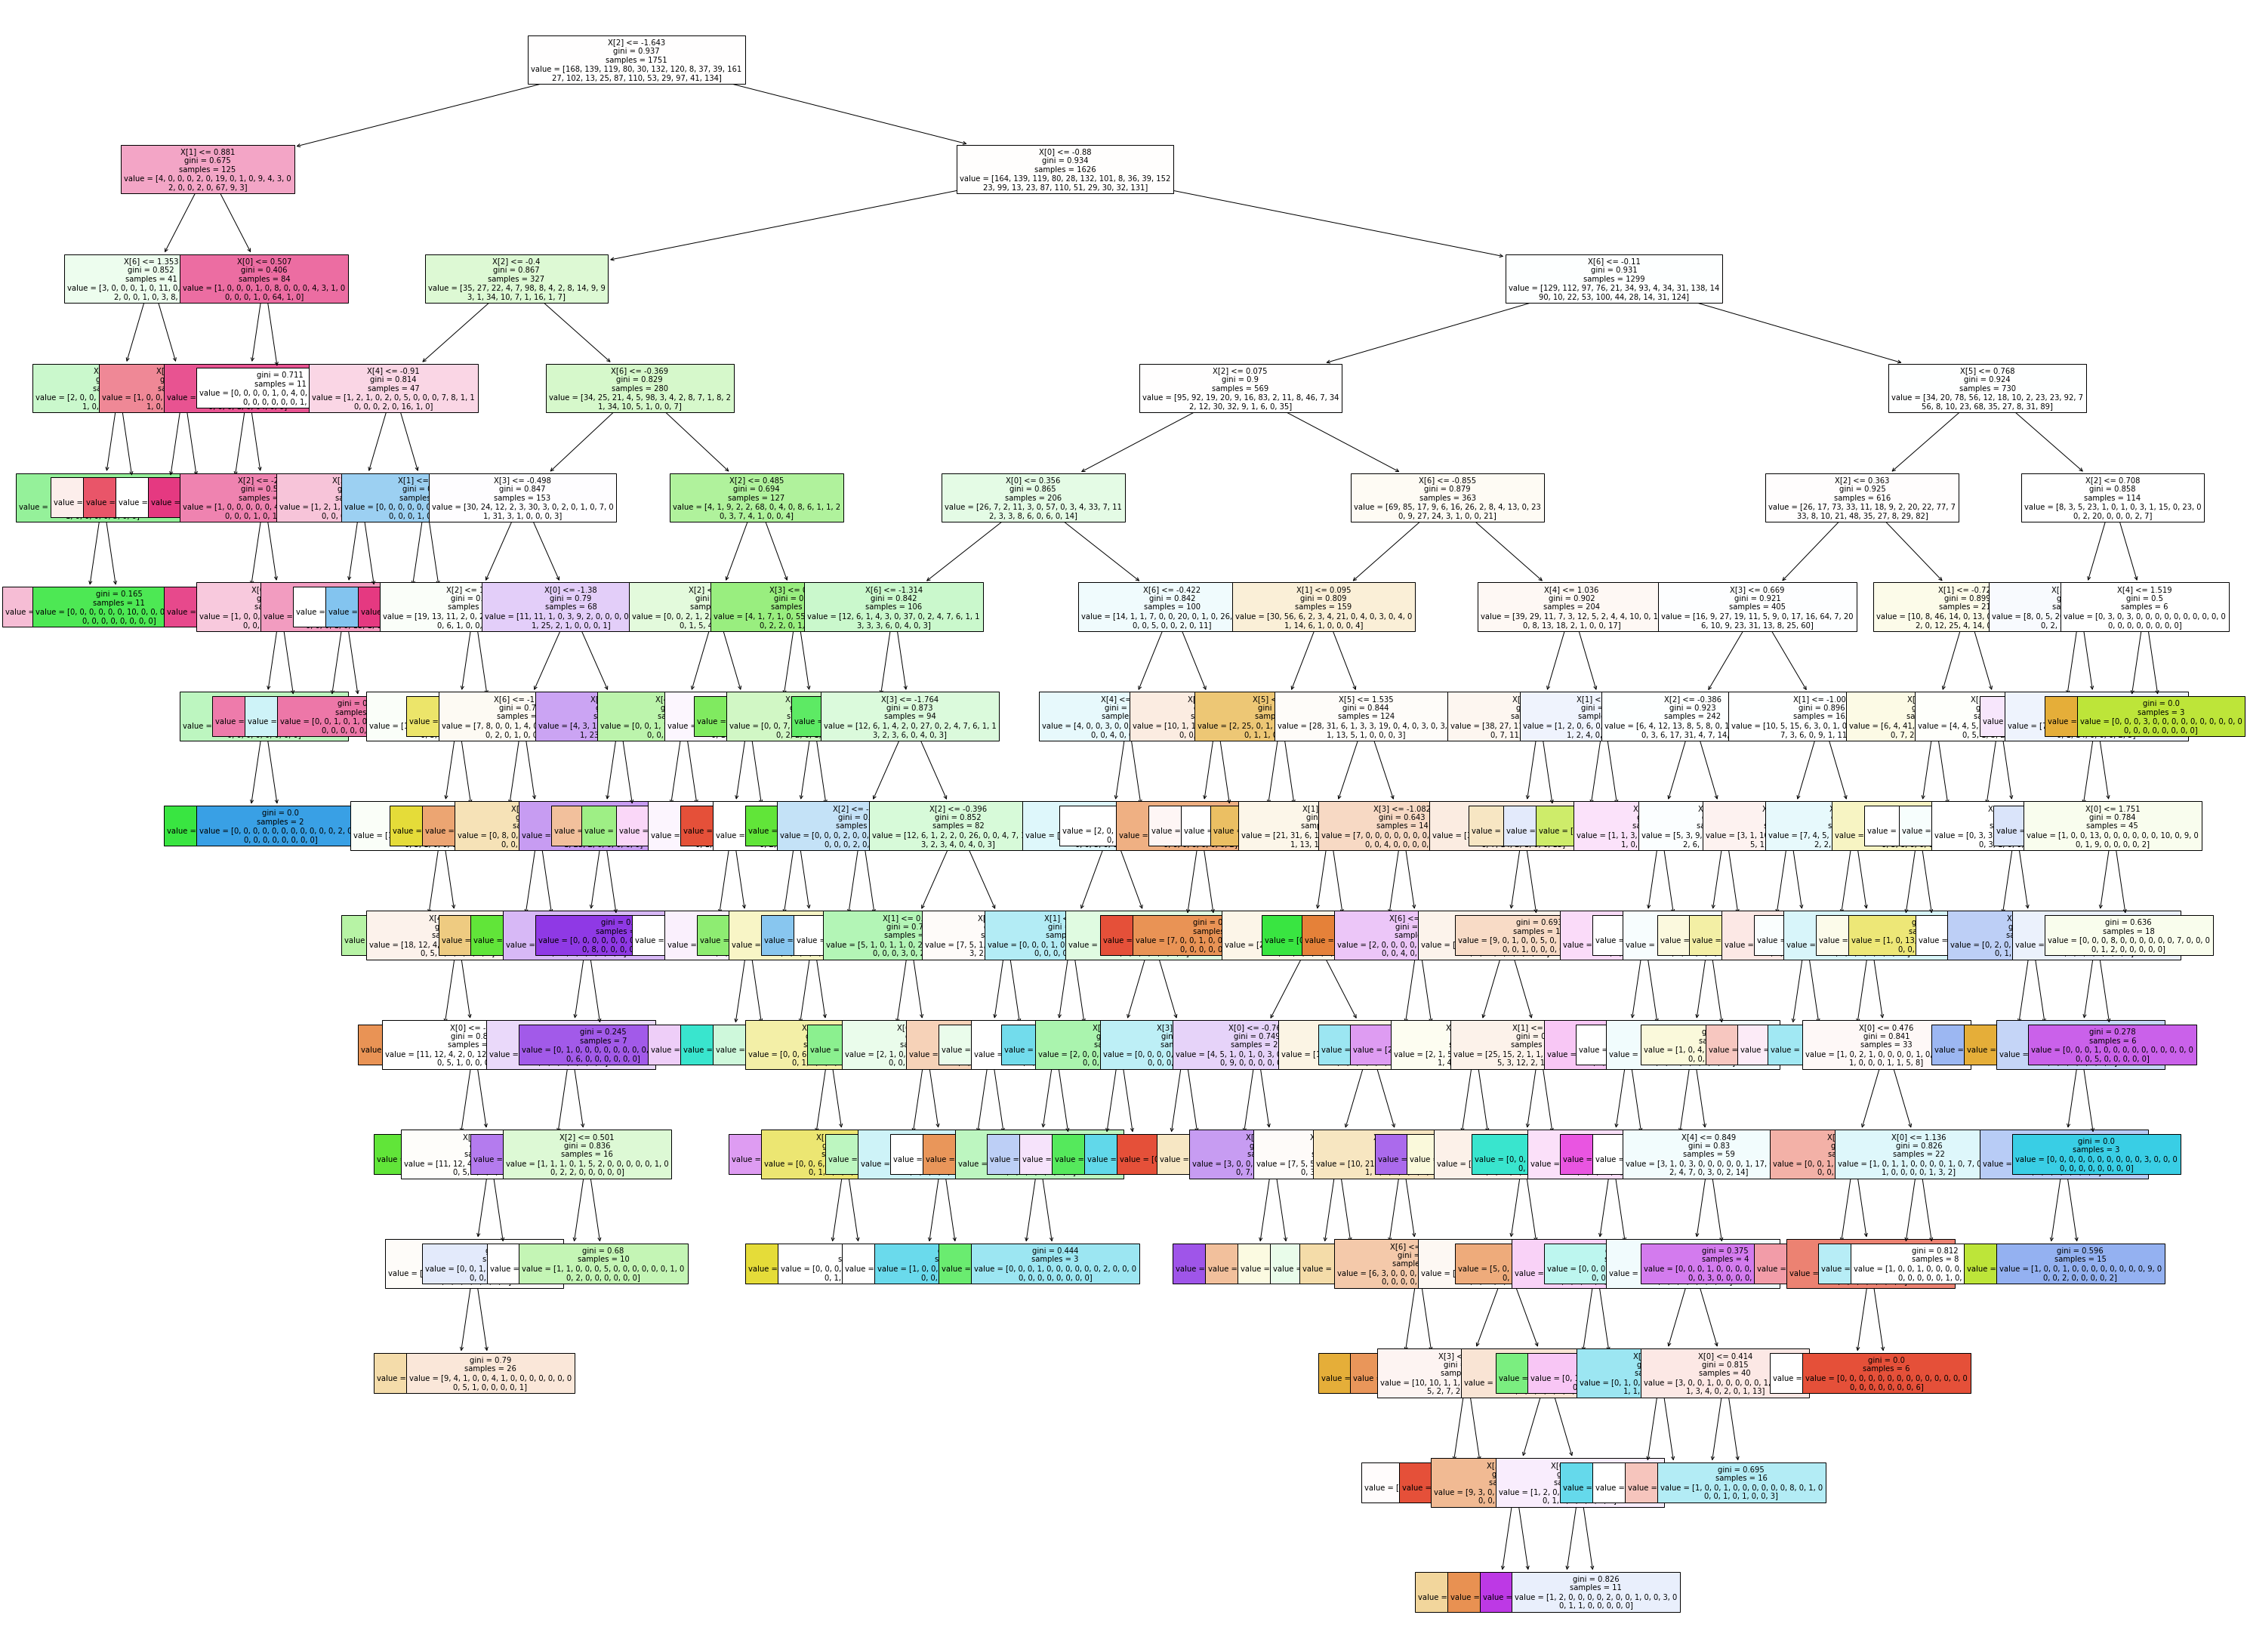

In [12]:
# Visualize the tree using plot_tree
fig = plt.figure(figsize=(50,40))
annotations = plot_tree(model['tree'], filled=True, fontsize=10) # Assign text annotations to variable to not print

In [13]:
# Tune other parameters
params = {'max_depth': [2,4,6,8,10,12,14,16,18,20,22,24], #The maximum depth of the tree
         'min_samples_split': [2,3,4], #The minimum number of samples required to split an internal node
         'min_samples_leaf': [1,2], #The minumum number of samples required to be at a leaf node
         'ccp_alpha': [0.001244744076847536]}

clf = DecisionTreeClassifier()
gcv = GridSearchCV(estimator=clf,param_grid=params)
gcv.fit(X_train,y_train)
print(gcv.best_estimator_)

DecisionTreeClassifier(ccp_alpha=0.001244744076847536, max_depth=6)


Train score 0.32038834951456313
Test score 0.21304926764314247
Train Confusion matrix


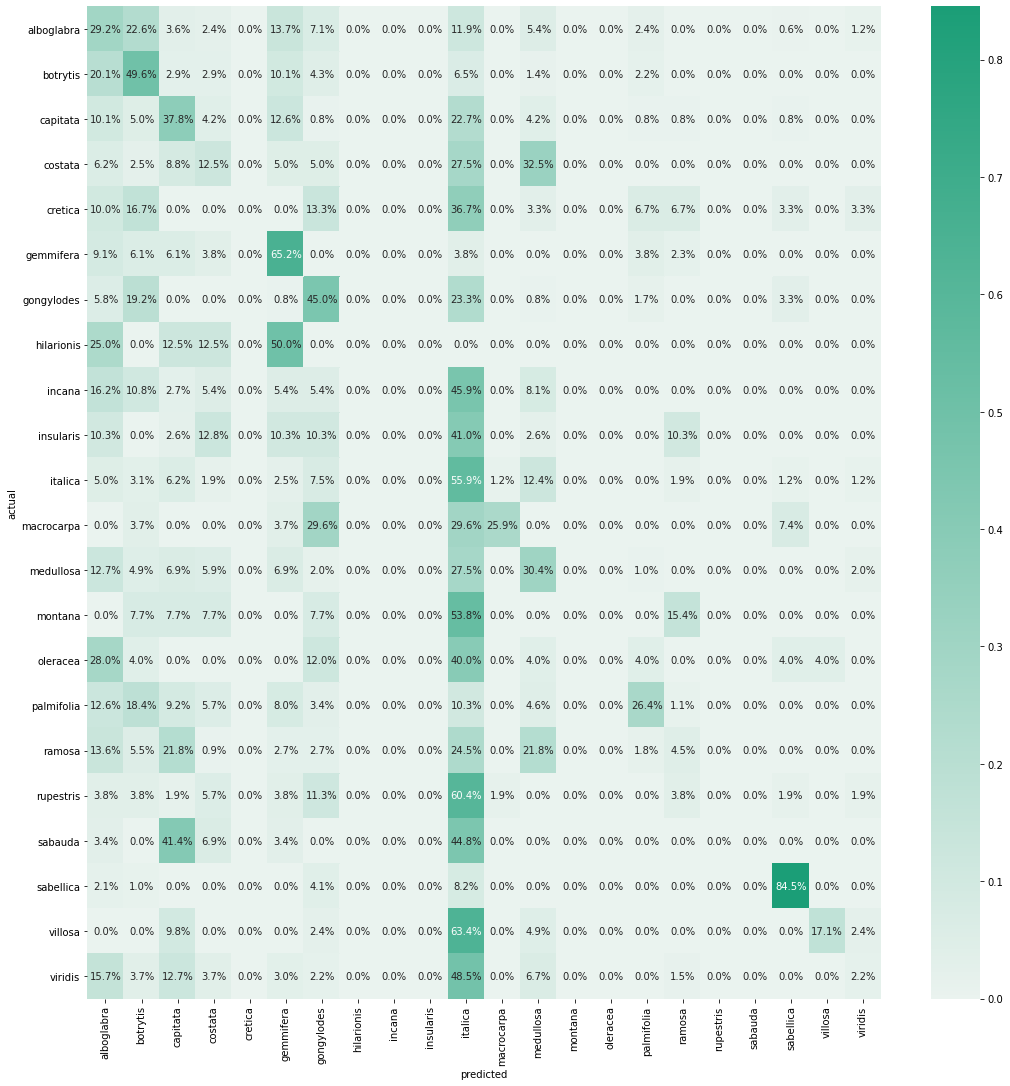

Test Confusion matrix


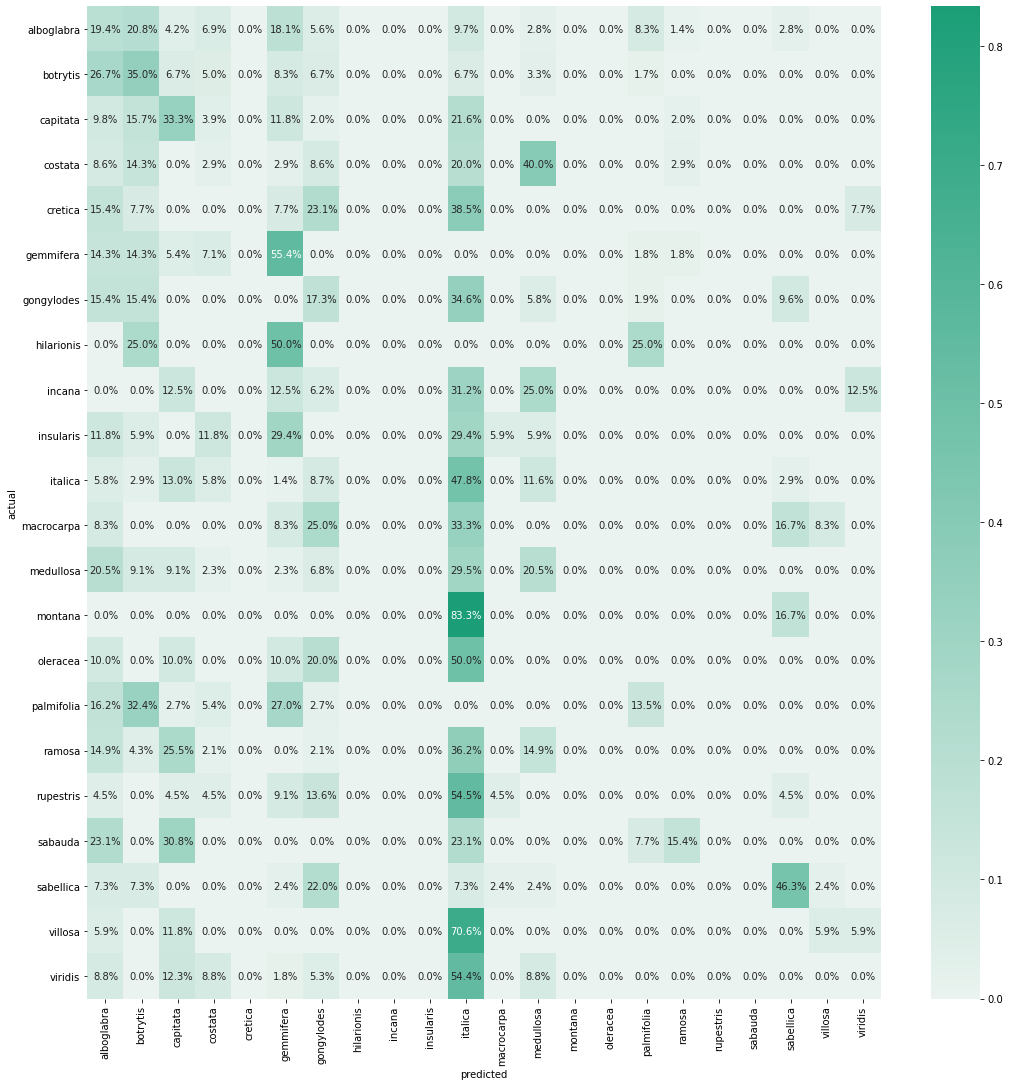

In [14]:
model = gcv.best_estimator_
model.fit(X_train,y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print(f'Train score {accuracy_score(y_train_pred,y_train)}')
print(f'Test score {accuracy_score(y_test_pred,y_test)}')

DT_f1 = plt.figure(figsize=(15,15))
plot_confusionmatrix(y_train,y_train_pred,dom='Train')
DT_f1.savefig("ALL_DT_train_confusionMatrix.pdf", format='pdf')

DT_f2 = plt.figure(figsize=(15,15))
plot_confusionmatrix(y_test,y_test_pred,dom='Test')
DT_f2.savefig("ALL_DT_test_confusionMatrix.pdf", format='pdf')

### Random Forests

In [15]:
## set up vairables for random forest

X = df.drop(columns=['img', 'id', 'rep', 'leafNum', 'morphotype', 'morphotpe_Num', 'pheno'])
y = df['morphotpe_Num']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)


model_RF = Pipeline([ 
    ('scaler', StandardScaler()),
    ('forest', RandomForestClassifier(n_estimators=10000, ccp_alpha=0.001244744076847536, max_depth=6)) #best estimator values from above
])

model_RF.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('forest',
                 RandomForestClassifier(ccp_alpha=0.001244744076847536,
                                        max_depth=6, n_estimators=10000))])

Train score 0.4448886350656768
Test score 0.27030625832223704
Train Confusion matrix


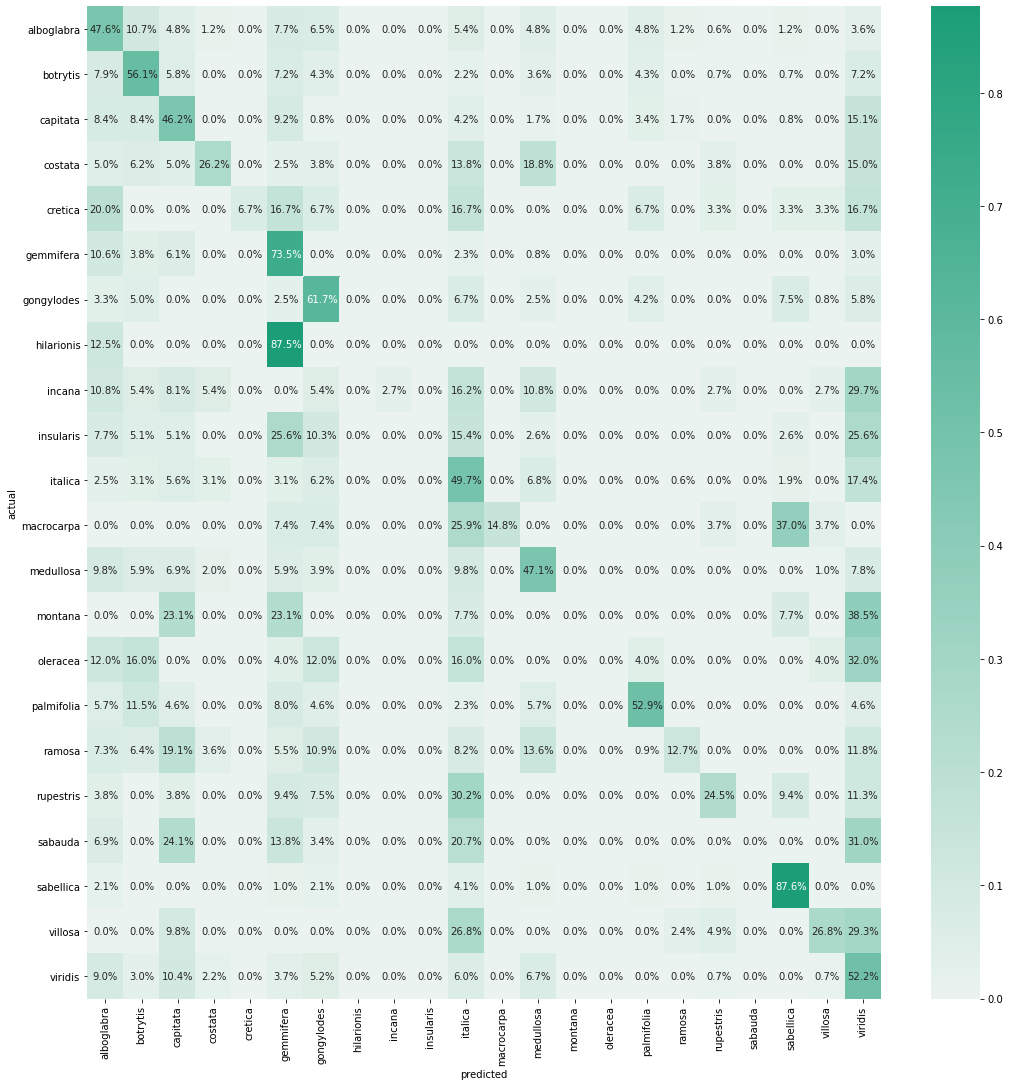

Test Confusion matrix


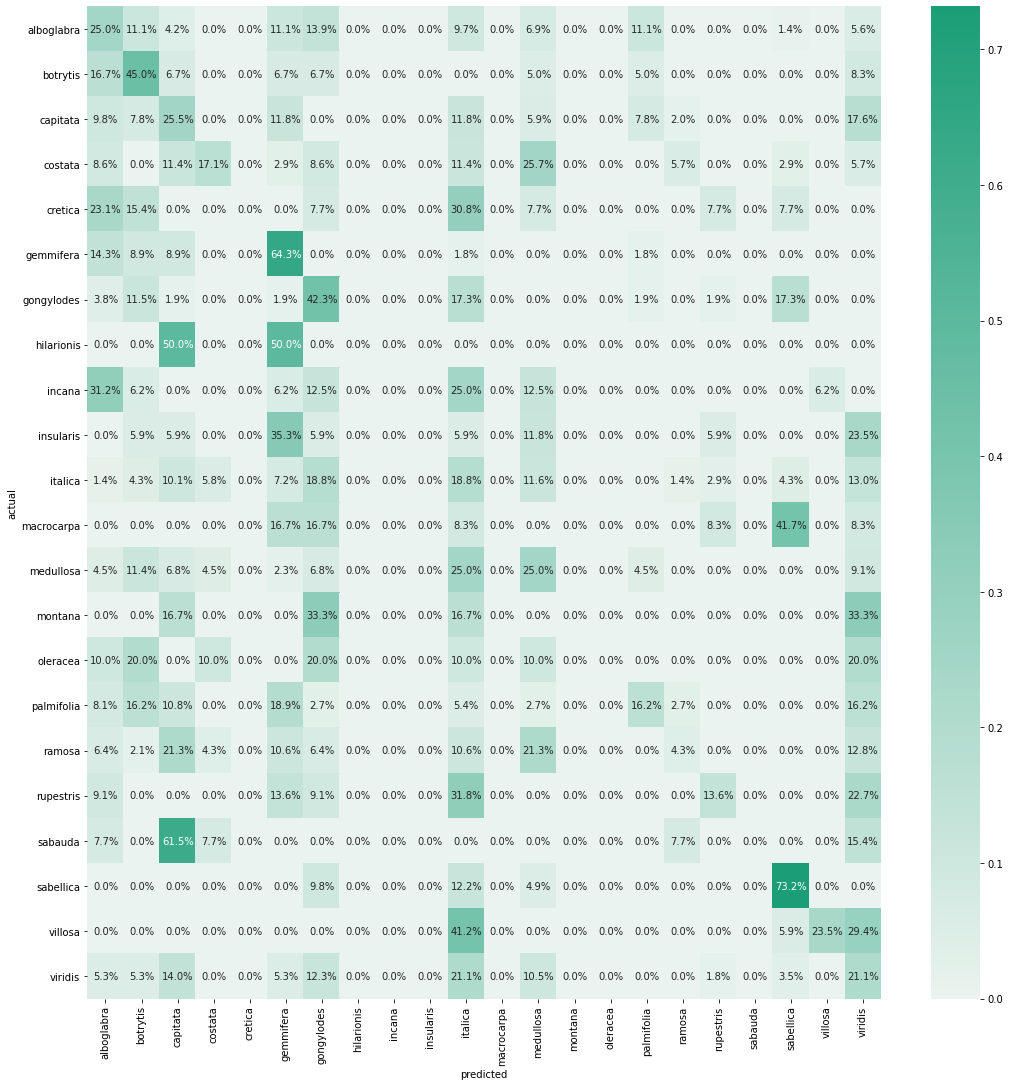

In [16]:
# Get accuracy
y_train_pred = model_RF.predict(X_train)
y_test_pred = model_RF.predict(X_test)

print(f'Train score {accuracy_score(y_train_pred,y_train)}')
print(f'Test score {accuracy_score(y_test_pred,y_test)}')

f1 = plt.figure(figsize=(15,15))
plot_confusionmatrix(y_train,y_train_pred,dom='Train')
f1.savefig("ALL_RF_train_confusionMatrix.pdf", format='pdf')

f2 = plt.figure(figsize=(15,15))
plot_confusionmatrix(y_test,y_test_pred,dom='Test')
f2.savefig("ALL_RF_test_confusionMatrix.pdf", format='pdf')


In [17]:
#for a good explation of results below: https://medium.com/analytics-vidhya/evaluating-a-random-forest-model-9d165595ad56
print(metrics.classification_report(y_test_pred, y_test))

              precision    recall  f1-score   support

           1       0.25      0.26      0.25        70
           2       0.45      0.36      0.40        74
           3       0.25      0.18      0.21        74
           4       0.17      0.38      0.24        16
           5       0.00      0.00      0.00         0
           6       0.64      0.40      0.49        91
           7       0.42      0.27      0.33        82
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         0
          10       0.00      0.00      0.00         0
          11       0.19      0.13      0.15       101
          12       0.00      0.00      0.00         0
          13       0.25      0.17      0.20        64
          14       0.00      0.00      0.00         0
          15       0.00      0.00      0.00         0
          16       0.16      0.24      0.19        25
          17       0.04      0.25      0.07         8
          18       0.14    

/home/kenziemabry/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
/home/kenziemabry/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
/home/kenziemabry/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.


In [18]:
fi = pd.DataFrame({'feature': list(X_train.columns),
                   'importance': model_RF['forest'].feature_importances_}).\
                    sort_values('importance', ascending = False)

# Display
fi

,feature,importance
2,convexity,0.234409
6,aspect_ratio,0.164919
1,circularity,0.140782
4,width,0.138557
0,area,0.134067
5,length,0.110576
3,solidity,0.076689
